# Shape Finder
Given an image with various shapes this code does the following:
* Converts to gray scale
* Converts the gray scale image to binary black or white based on a theshold
* Gets list of contours
* Gets approximate polygons
* Based on the number of sides of polygon the shape is drawn and the name is written at the center of the shape 

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.0 


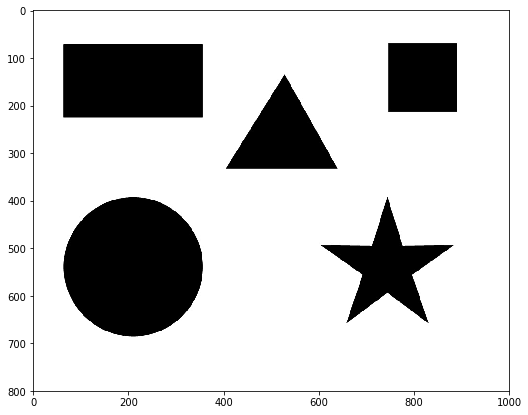

In [2]:
# Load and then gray scale image
image = cv2.imread('images/someshapes.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 7))
plt.imshow(image)
plt.show()

In [9]:
def Shape_Finder(cnt,image):
    
    # Get approximate polygons
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True),True)

    if len(approx) == 3:
        shape_name = "Triangle"
        cv2.drawContours(image,[cnt],0,(0,255,0), 5)

            # Find contour center to place text at the center
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        return cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (90, 90, 90), 3)

    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(cnt)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])

        # Check to see if 4-side polygon is square or rectangle
        # cv2.boundingRect returns the top left and then width and 
        if abs(w-h) <= 3:
            shape_name = "Square"

            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 0, 255), 5)
            return cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (90, 90, 90), 3)
        else:
            shape_name = "Rectangle"

            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 127, 255), 5)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            return cv2.putText(image, shape_name, (cx-74, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (90, 90, 90), 3)

    elif len(approx) == 10:
        shape_name = "Star"
        cv2.drawContours(image, [cnt], 0, (255, 255, 0), 5)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        return cv2.putText(image, shape_name, (cx-30, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (90, 90, 90), 3)



    elif len(approx) >= 15:
        shape_name = "Circle"
        cv2.drawContours(image, [cnt], 0, (0, 255, 255), 5)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        return cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (90, 90, 90), 3)  
     

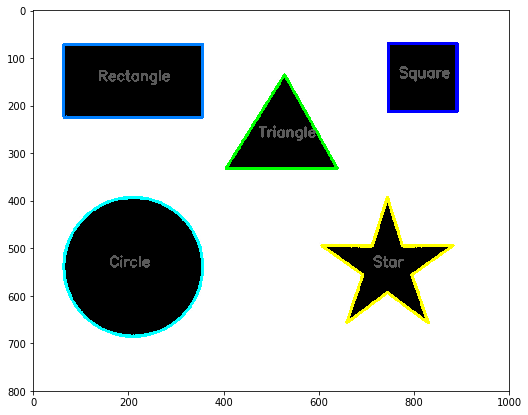

In [10]:
image = cv2.imread('images/someshapes.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# If pixel value is greater than a threshold value,it is assigned white
# Note: 0 is black. 255 is white which threshold converts to 1 
ret, thresh = cv2.threshold(gray, 127, 255, 1)

# Extract Contours
_,contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#Loop through contours, get number of sides of polygons and identify shape based on it
for cnt in contours:
    image1=Shape_Finder(cnt,image)

plt.figure(figsize=(10, 7))
plt.imshow(image1)
plt.show()